In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_excel('indonesian_insurance_gdp.xlsx')
df

,year,life premi,non life premi,private con,gov ex,inestment,trade,inflation,gdp
0,1996,0.505871,0.644390,62.36,7.566959,31.60,52.264744,8.676510,227370000000
1,1997,0.560647,0.610687,61.68,6.842805,30.31,55.993859,12.571376,215749000000
2,1998,0.480243,0.666057,67.78,5.693508,27.43,96.186192,75.271169,95445547873
3,1999,0.464260,0.554159,73.94,6.604457,22.14,62.943913,14.161196,140001000000
4,2000,0.492913,0.499936,61.65,6.531995,22.25,71.436876,20.447457,165021000000
5,2001,0.515709,0.599793,63.15,6.889059,22.54,69.793208,14.295715,160447000000
6,2002,0.580209,0.647713,67.62,7.257458,21.40,59.079462,5.896052,195661000000
7,2003,0.641370,0.616056,68.14,8.129486,25.60,53.616494,5.487429,234772000000
8,2004,0.751753,0.600673,66.77,8.321868,24.06,59.761295,8.550727,256837000000
9,2005,0.744093,0.557354,64.36,8.109508,25.08,63.987936,14.331787,285869000000


In [ ]:
df.isnull().sum()

year              0
life premi        0
non life premi    0
private con       0
gov ex            0
inestment         0
trade             0
inflation         0
gdp               0
dtype: int64

In [ ]:
r = df.corr(method='pearson')
r

,year,life premi,non life premi,private con,gov ex,inestment,trade,inflation,gdp
year,1.000000,0.284385,-0.203847,0.054894,0.357341,0.085457,-0.297416,-0.356086,0.698640
life premi,0.284385,1.000000,0.839343,-0.761625,0.875342,-0.288123,0.748003,-0.454839,-0.230009
non life premi,-0.203847,0.839343,1.000000,-0.782999,0.704404,-0.204892,0.889046,-0.304518,-0.562462
private con,0.054894,-0.761625,-0.782999,1.000000,-0.739261,0.037509,-0.848607,0.400974,0.260925
gov ex,0.357341,0.875342,0.704404,-0.739261,1.000000,-0.228432,0.688170,-0.573064,-0.194736
inestment,0.085457,-0.288123,-0.204892,0.037509,-0.228432,1.000000,-0.365418,-0.010364,0.569987
trade,-0.297416,0.748003,0.889046,-0.848607,0.688170,-0.365418,1.000000,-0.211247,-0.678058
inflation,-0.356086,-0.454839,-0.304518,0.400974,-0.573064,-0.010364,-0.211247,1.000000,-0.150778
gdp,0.698640,-0.230009,-0.562462,0.260925,-0.194736,0.569987,-0.678058,-0.150778,1.000000


In [ ]:
r_square = r**2

r_square

,year,life premi,non life premi,private con,gov ex,inestment,trade,inflation,gdp
year,1.000000,0.080875,0.041554,0.003013,0.127693,0.007303,0.088456,0.126797,0.488098
life premi,0.080875,1.000000,0.704496,0.580073,0.766224,0.083015,0.559508,0.206879,0.052904
non life premi,0.041554,0.704496,1.000000,0.613088,0.496185,0.041981,0.790402,0.092731,0.316363
private con,0.003013,0.580073,0.613088,1.000000,0.546507,0.001407,0.720134,0.160780,0.068082
gov ex,0.127693,0.766224,0.496185,0.546507,1.000000,0.052181,0.473578,0.328402,0.037922
inestment,0.007303,0.083015,0.041981,0.001407,0.052181,1.000000,0.133530,0.000107,0.324885
trade,0.088456,0.559508,0.790402,0.720134,0.473578,0.133530,1.000000,0.044625,0.459763
inflation,0.126797,0.206879,0.092731,0.160780,0.328402,0.000107,0.044625,1.000000,0.022734
gdp,0.488098,0.052904,0.316363,0.068082,0.037922,0.324885,0.459763,0.022734,1.000000


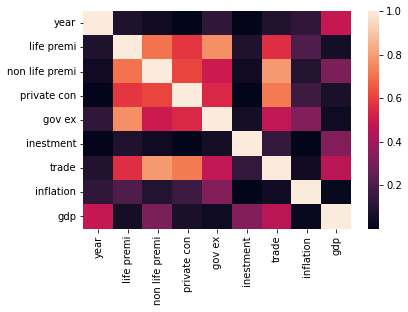

In [ ]:
sns.heatmap(r_square);

In [ ]:
endog = df['gdp']
model = sm.tsa.SARIMAX(endog, trend='c')
res = model.fit()

print(res.summary())

                           Statespace Model Results                           
Dep. Variable:                    gdp   No. Observations:                   48
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1304.507
Date:                Sat, 05 Mar 2022   AIC                           2615.013
Time:                        07:58:41   BIC                           2620.627
Sample:                             0   HQIC                          2617.135
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.294e+10   2.02e-14   2.62e+24      0.000    5.29e+10    5.29e+10
ar.L1          0.8544      0.021     40.212      0.000       0.813       0.896
sigma2      2.333e+22   3.06e-25   7.61e+46      0.0

In [ ]:
fcast = res.get_forecast(5)
print(fcast.summary_frame(alpha=0.05))

gdp          mean       mean_se  mean_ci_lower  mean_ci_upper
48   3.645622e+11  1.527283e+11   6.522016e+10   6.639043e+11
49   3.644428e+11  2.008872e+11  -2.928891e+10   7.581744e+11
50   3.643407e+11  2.297578e+11  -8.597637e+10   8.146578e+11
51   3.642535e+11  2.487282e+11  -1.232447e+11   8.517517e+11
52   3.641790e+11  2.617110e+11  -1.487651e+11   8.771231e+11
